In [1]:
import sys, h5py, pdb,time, glob
from importlib import reload
import pylab as pl, numpy as np
from numpy import log10 as log
from astropy import units as un, constants as cons
import scipy, scipy.stats
from matplotlib import ticker
sys.path.append('../pysrc')

In [2]:
import FIRE_files as ff
from FIRE_files import cosmo, u
from projectPlotBasics import *
import first_pass as l
cmap = pl.get_cmap('viridis')

Behroozi+18 not loaded


In [3]:
simnames = [x.split('/')[-1] for x in glob.glob('../../data/vc*')]

In [4]:
sims = []
for simname in simnames:
    vc = float(simname.split('_')[0][2:])
    PL_potential = l.PowerLawPotential(m=0.,vc_Rvir=vc*un.km/un.s,Rvir=200*un.kpc)
    Rcirc = float(simname.split('_')[3][5:])
    simdir = '../../data/%s/output/'%simname
    sim = l.KY_sim(simname,simdir,
                   dynamicCentering=True,recalc=False,Nsnapshots=None,
                   origin=np.zeros(3),Rcirc = Rcirc*un.kpc,
                   analyticGravity=PL_potential)
    print(sim.galaxyname, sim.Nsnapshots())
    sims.append(sim)

loaded PartType0, Coordinates
loaded PartType0, Masses
vc100_Rs30_Mdot1730_Rcirc10_turb 2001
loaded PartType0, Coordinates
loaded PartType0, Masses
vc100_Rs0_Mdot110_Rcirc1 401
loaded PartType0, Coordinates
loaded PartType0, Masses
vc100_Rs3_Mdot137_Rcirc10 401
loaded PartType0, Coordinates
loaded PartType0, Masses
vc100_Rs0_Mdot535_Rcirc1 401
loaded PartType0, Coordinates
loaded PartType0, Masses
vc100_Rs3_Mdot1121_Rcirc10 401
loaded PartType0, Coordinates
loaded PartType0, Masses
vc150_Rs3_Mdot841_Rcirc1 401
loaded PartType0, Coordinates
loaded PartType0, Masses
vc150_Rs0_Mdot3859_Rcirc10 401
loaded PartType0, Coordinates
loaded PartType0, Masses
vc100_Rs3_Mdot137_Rcirc1 401
loaded PartType0, Coordinates
loaded PartType0, Masses
vc150_Rs3_Mdot7470_Rcirc1 263
loaded PartType0, Coordinates
loaded PartType0, Masses
vc100_Rs30_Mdot1730_Rcirc10_turb_mag 2001
loaded PartType0, Coordinates
loaded PartType0, Masses
vc100_Rs3_Mdot1121_Rcirc1 401
loaded PartType0, Coordinates
loaded PartType0,

../pysrc/FIRE_files.py:89: RuntimeWarning: divide by zero encountered in log10
  f_H_He((log(T), log(nH))) + f_Z((log(T), log(nH))) * Z2Zsun )
/srv/conda/envs/notebook/lib/python3.7/site-packages/scipy/interpolate/interpolate.py:2546: RuntimeWarning: invalid value encountered in add
  values += np.asarray(self.values[edge_indices]) * weight[vslice]
../pysrc/FIRE_files.py:89: RuntimeWarning: divide by zero encountered in log10
  f_H_He((log(T), log(nH))) + f_Z((log(T), log(nH))) * Z2Zsun )
/srv/conda/envs/notebook/lib/python3.7/site-packages/scipy/interpolate/interpolate.py:2546: RuntimeWarning: invalid value encountered in add
  values += np.asarray(self.values[edge_indices]) * weight[vslice]
../pysrc/FIRE_files.py:89: RuntimeWarning: divide by zero encountered in log10
  f_H_He((log(T), log(nH))) + f_Z((log(T), log(nH))) * Z2Zsun )
/srv/conda/envs/notebook/lib/python3.7/site-packages/scipy/interpolate/interpolate.py:2546: RuntimeWarning: invalid value encountered in add
  values += np

../pysrc/FIRE_files.py:89: RuntimeWarning: divide by zero encountered in log10
  f_H_He((log(T), log(nH))) + f_Z((log(T), log(nH))) * Z2Zsun )
/srv/conda/envs/notebook/lib/python3.7/site-packages/scipy/interpolate/interpolate.py:2546: RuntimeWarning: invalid value encountered in add
  values += np.asarray(self.values[edge_indices]) * weight[vslice]


KeyboardInterrupt: 

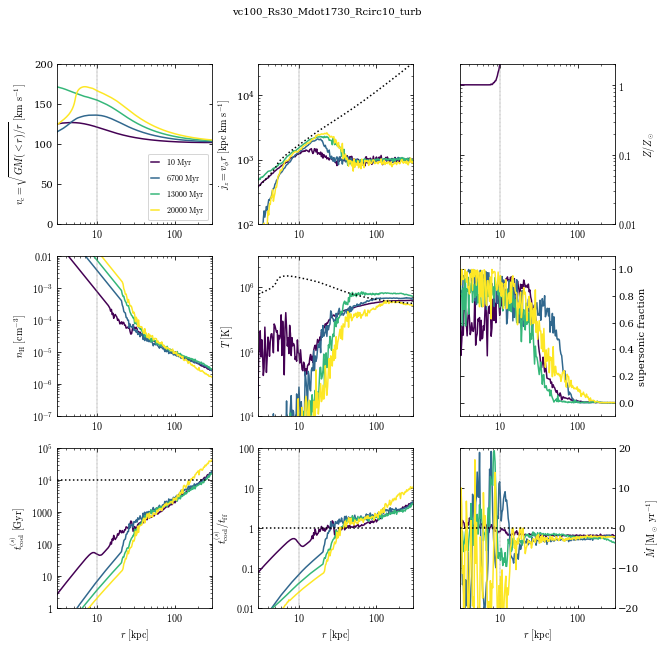

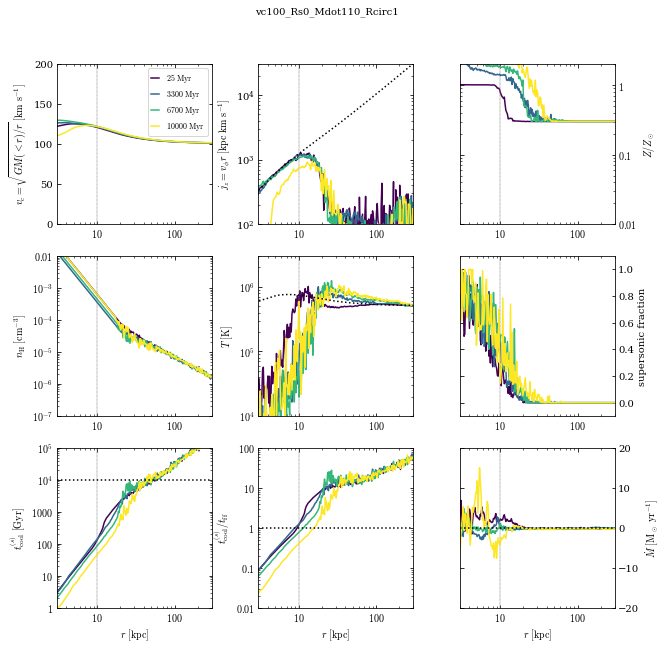

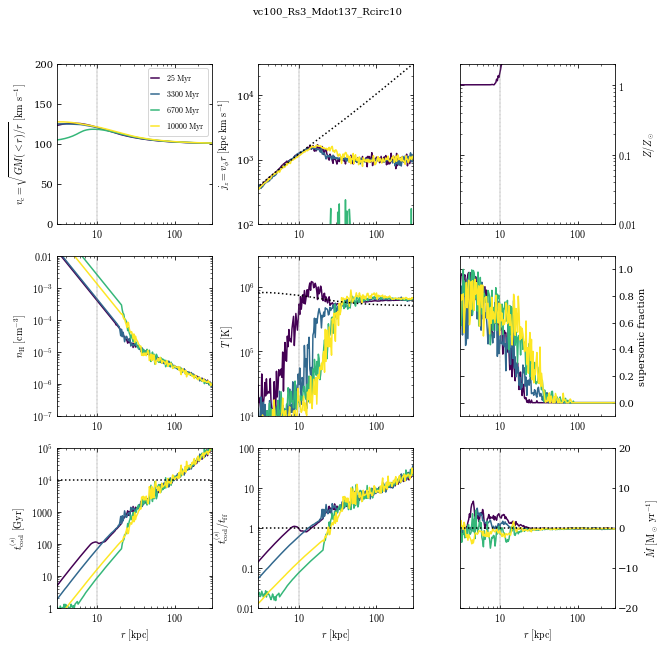

In [9]:
for sim in sims:
    iSnapshots = np.linspace(1,sim.Nsnapshots()-1,4).astype(int)
    l.CGM_properties(sim, iSnapshots,Rcirc=10)

In [ ]:
reload(l); reload(l.ff); reload(ff)
for simname in simnames:
    _ = sim.timeSeries(rMdot = 30*un.kpc,rVrot=5*un.kpc,multipleProcs=10,justLoad=False)
    sim.quantities_at_Rcirc()

progress:  70% 641 seconds passed
starting snapshot #284,   process id: 1567
loaded PartType0, Coordinates
loaded PartType0, Masses
loaded PartType0, Coordinates
loaded PartType0, Masses
loaded PartType0, StarFormationRate
saved sfrs
loaded PartType0, InternalEnergy
loaded PartType0, Velocities
saved Mdot
loaded PartType0, NeutralHydrogenAbundance
saved HImassProfile
saved massProfile0
loaded PartType1, Masses
loaded PartType2, Masses
loaded PartType2, Coordinates
saved massProfile2
loaded PartType4, Masses
loaded PartType4, Coordinates
saved massProfile4
saved v_phi_HI


../pysrc/FIRE_files.py:865: RuntimeWarning: invalid value encountered in true_divide
  normed_hist = [hist[i,:]/hist[0,:] for i in range(1,hist.shape[0])]


saved v_phi2_HI
loaded PartType0, Metallicity
saved Z2Zsuns_MW
loaded PartType0, Density
saved log_Ts_VW
ending snapshot #284,   process id: 1567
starting snapshot #285,   process id: 1567


../pysrc/FIRE_files.py:89: RuntimeWarning: divide by zero encountered in log10
  f_H_He((log(T), log(nH))) + f_Z((log(T), log(nH))) * Z2Zsun )
/srv/conda/envs/notebook/lib/python3.7/site-packages/scipy/interpolate/interpolate.py:2546: RuntimeWarning: invalid value encountered in add
  values += np.asarray(self.values[edge_indices]) * weight[vslice]


loaded PartType0, Coordinates
loaded PartType0, Masses


In [ ]:
for simname in simnames:
    for edge_on in (True,False):
        sim.movie(l.temperature_and_pressure_movieFrame_async,
              multipleProcs=12,
              calculateProjections=True,start=None,
              edge_on=edge_on,
              lazy=True)